If I have six numbers 1,3,-1,0,2,4 then I can do rolling averages...

The rolling average based on two sequential data points would give (1+3)/2 = 2 and (3-1)/2 = 1 as the first two numbers.  There are five sequential pairs and so the rolling average would be 2, 1, -.5, 1, 3

The rolling average based on three sequential data points would give (1+3-1)/3 = 1 and (3-1+0)/3 = 2/3 as the first two numbers.  There are four sequential triples and the rolling average would be 1, 2/3, 1/3, 2

You can see that the longer the window we're averaging over, the shorter the result is.  You can make the window longer and longer until, ouroboros-like, the window is the same length as the number of data points... at this point you get only one number in your rolling average: (1+3-1+0+2+6)/6 = 1.5

So.  What do we do?  Given a string of data, we can try window of various lengths and see what the rolling average does to the data.  

Given any tool, you try it on artificial data so that you have a chance of understanding what it does.

I've created a data file that has four strings of data: linear, linear+noise, trig, trig+noise

Let's start by loading the data and looking at the first string

<AxesSubplot:>

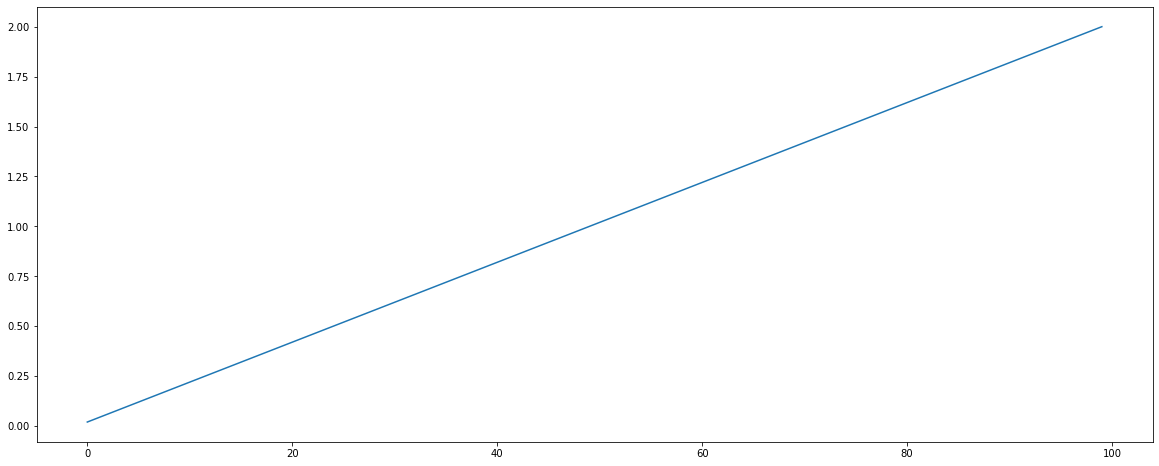

In [1]:
import pandas as pd
test_data_df = pd.read_csv("test_data.csv")
test_data_df['y_linear'].plot(figsize=(20,8))

Great!  It's a line.  What if I want to see my data points?

<AxesSubplot:>

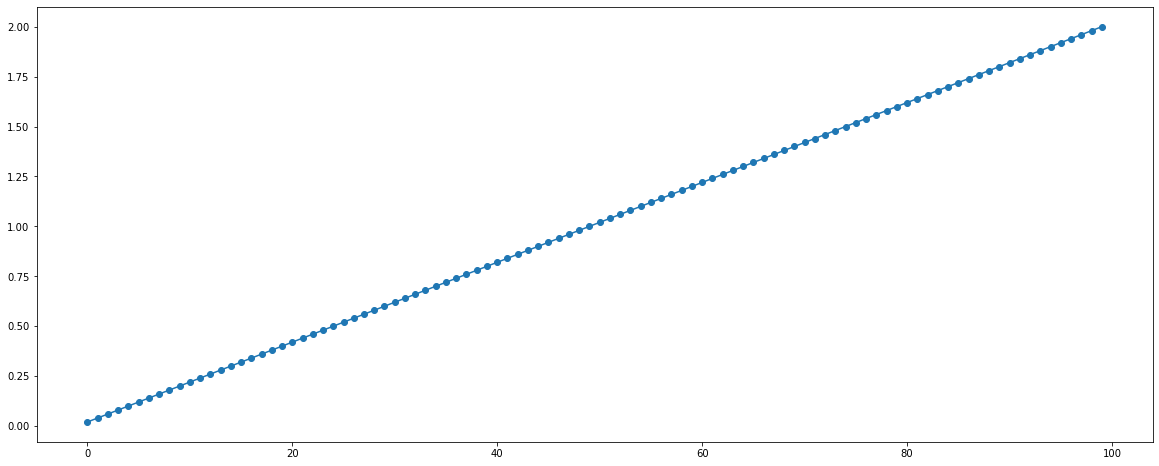

In [2]:
test_data_df['y_linear'].plot(figsize=(20,8),style='o-')

Great!  Now let's do a running average.  I need to choose the length of the window; I'll do this with the variable n.

In [3]:
n = 5
test_data_df['rolling_yl'] = test_data_df['y_linear'].rolling(window=n, center=True).mean()

We know that if there are 100 data points and the window is of length 5 then we'll get 100-5+1 = 96 averages.  How does this show up in the data frame?

In [4]:
test_data_df

,x,y_linear,y_linear_noise,y_trig,y_trig_noise,rolling_yl
0,1,0.02,0.260389,0.199001,0.370954,NaN
1,2,0.04,0.340931,0.196013,0.210239,NaN
2,3,0.06,-0.178852,0.191067,0.689278,0.06
3,4,0.08,-0.269071,0.184212,0.074238,0.08
4,5,0.10,-0.263079,0.175517,0.449048,0.10
...,...,...,...,...,...,...
95,96,1.92,1.478746,-0.196938,-0.251144,1.92
96,97,1.94,2.390844,-0.192473,-0.530319,1.94
97,98,1.96,2.028520,-0.186085,0.267501,1.96
98,99,1.98,2.062768,-0.177838,-0.434420,NaN


Pandas padded the head and the tail --- see those four NaNs?  Pandas put half at the head and half at the tail.  

Note: if n were even then there would be an odd number of NaNs and the padding would be unequal at the head and tail.  This would stop the following graphs from aligning perfectly (this comment will make sense in a bit, just go along for the ride for the moment.)  

Let's compare the original data to the rolling-average of the data:

<AxesSubplot:>

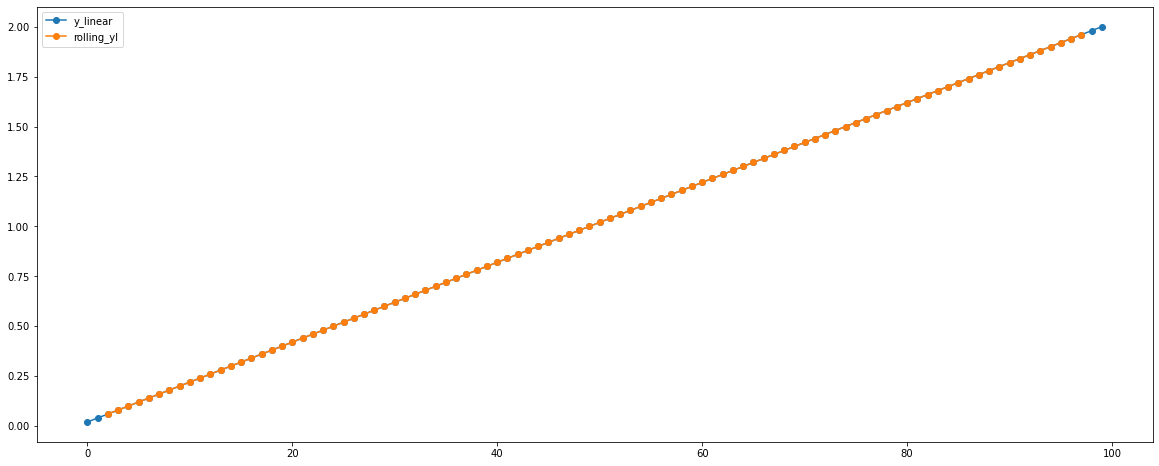

In [5]:
test_data_df[['y_linear','rolling_yl']].plot(figsize=(20,8),style='o-')

Aha!  Rolling averages do nothing (really) to linear functions.  Let's try this with a larger value of n = 25 and then move on to a more interesting example...

Note: if we'd taken n = 4 or 6 then the orange dots would be close to but not on the blue dots.  This is what I meant earlier about the effect of taking n even on the graph...

<AxesSubplot:>

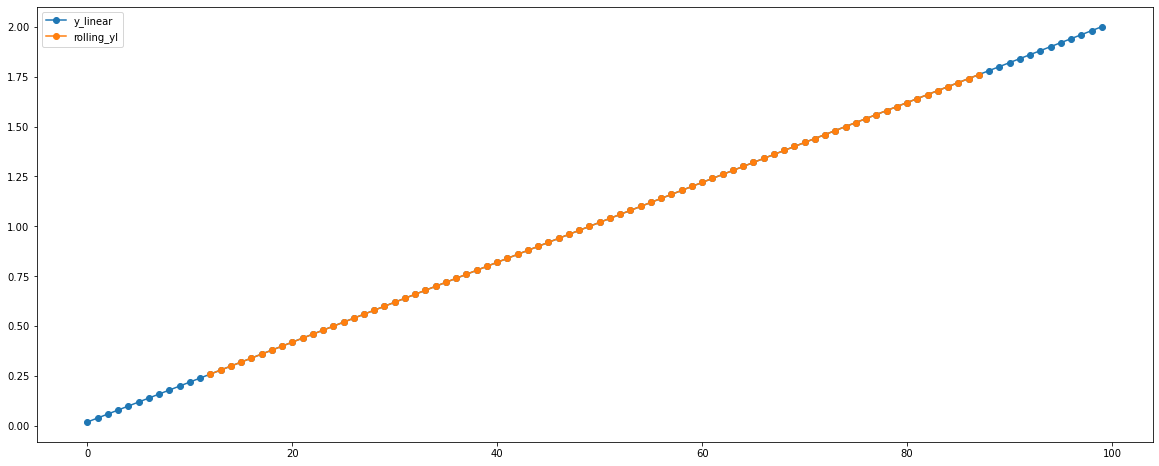

In [6]:
n = 25
test_data_df['rolling_yl'] = test_data_df['y_linear'].rolling(window=n, center=True).mean()
test_data_df[['y_linear','rolling_yl']].plot(figsize=(20,8),style='o-')

Now let's look at a linear sequence that's had noise added to it

<AxesSubplot:>

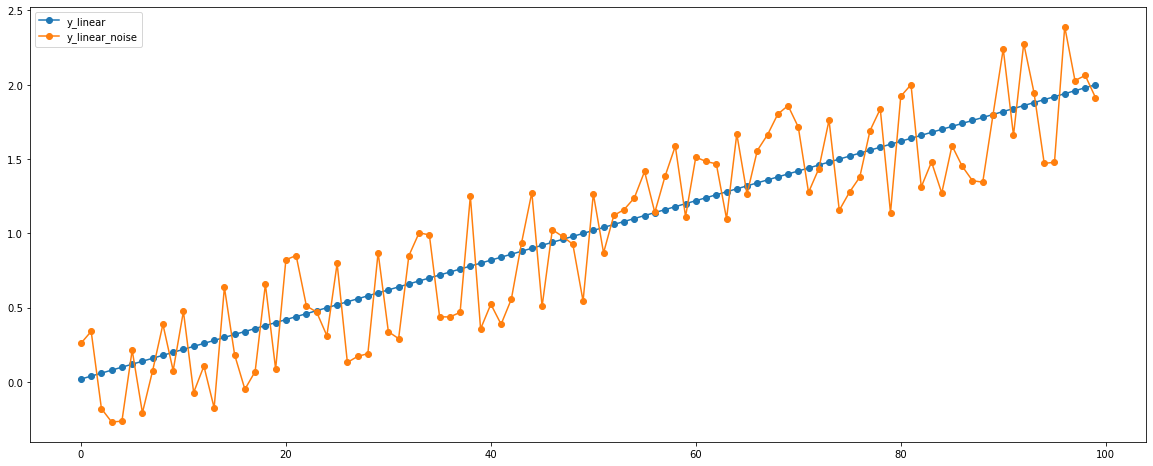

In [7]:
test_data_df[['y_linear','y_linear_noise']].plot(figsize=(20,8),style='o-')

If you only saw the orange line, you would say that it's increasing but can the rolling averages help us see the signal within the signal+noise?  Let's try increasing window sizes!  The green curve is the result of the running average.

<AxesSubplot:>

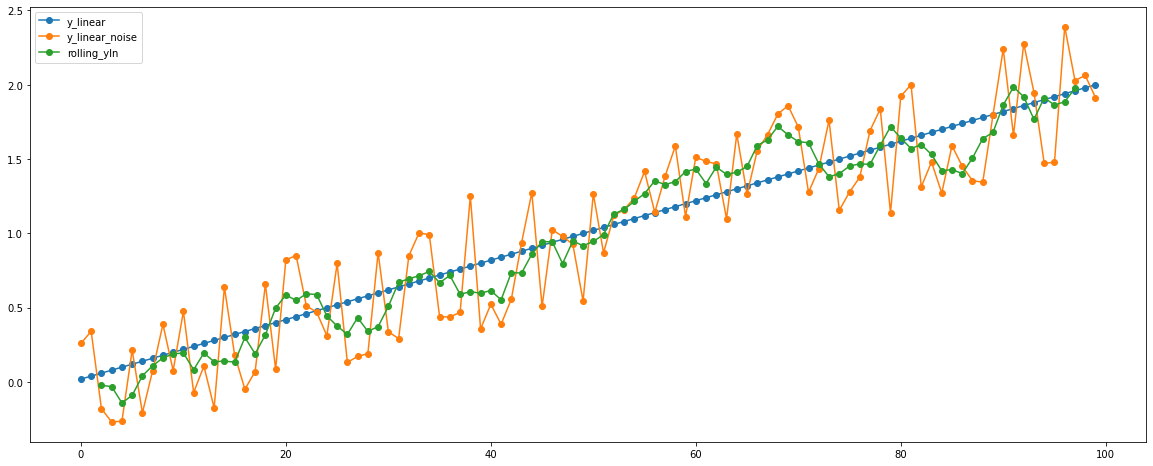

In [8]:
n = 5
test_data_df['rolling_yln'] = test_data_df['y_linear_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_linear','y_linear_noise','rolling_yln']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

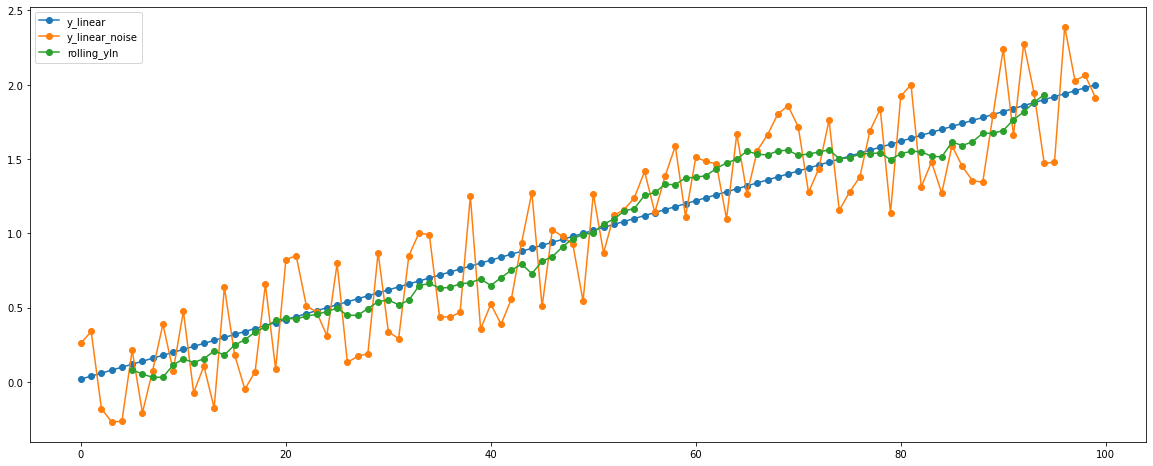

In [9]:
n = 11
test_data_df['rolling_yln'] = test_data_df['y_linear_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_linear','y_linear_noise','rolling_yln']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

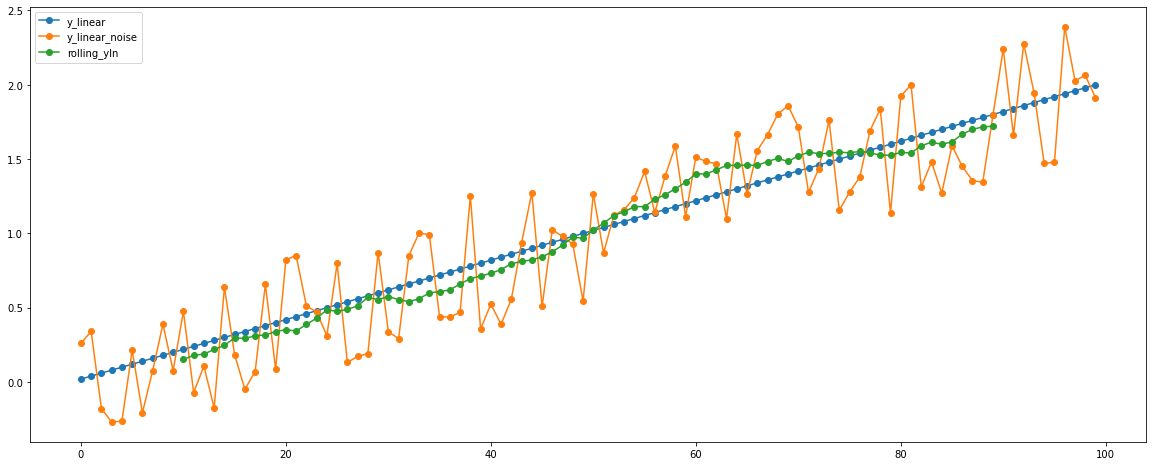

In [10]:
n = 21
test_data_df['rolling_yln'] = test_data_df['y_linear_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_linear','y_linear_noise','rolling_yln']].plot(figsize=(20,8),style='o-')

So we see that we seem to be getting closer to the true underlying signal (the blue line).  Will this always be true?

The thing is... averages work great with linear things.  They're useful for other things but not as perfect.  

Let's repeat the experiment with a nice trig function.  (Oooooooh!  Math Buzz Word!  Trig = trigonometric = a function like sine or cosine = a very function that goes up and down and up and down in a nice regular way and has other great properties too)

First let's look at the data

<AxesSubplot:>

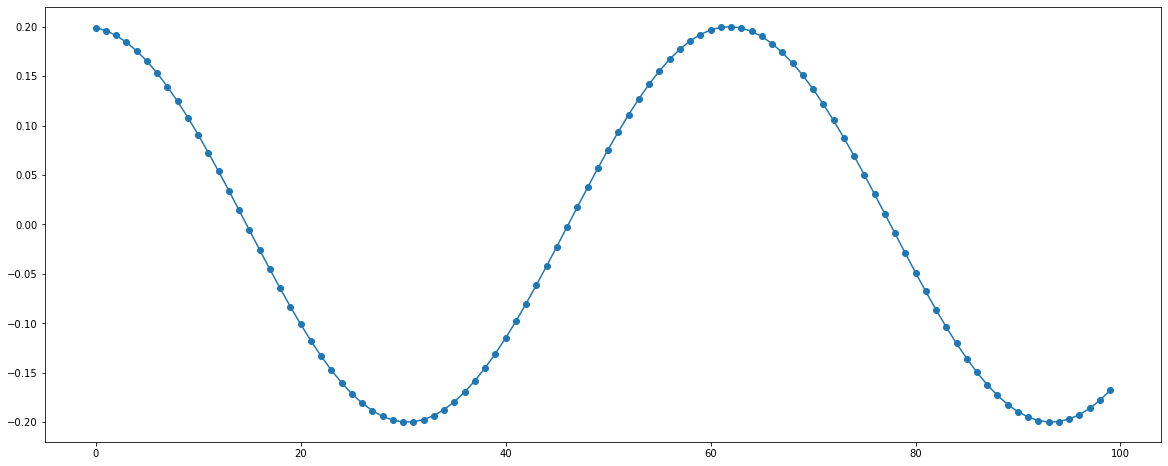

In [11]:
test_data_df['y_trig'].plot(figsize=(20,8),style='o-')

Now let's see what running averages do to this data!

<AxesSubplot:>

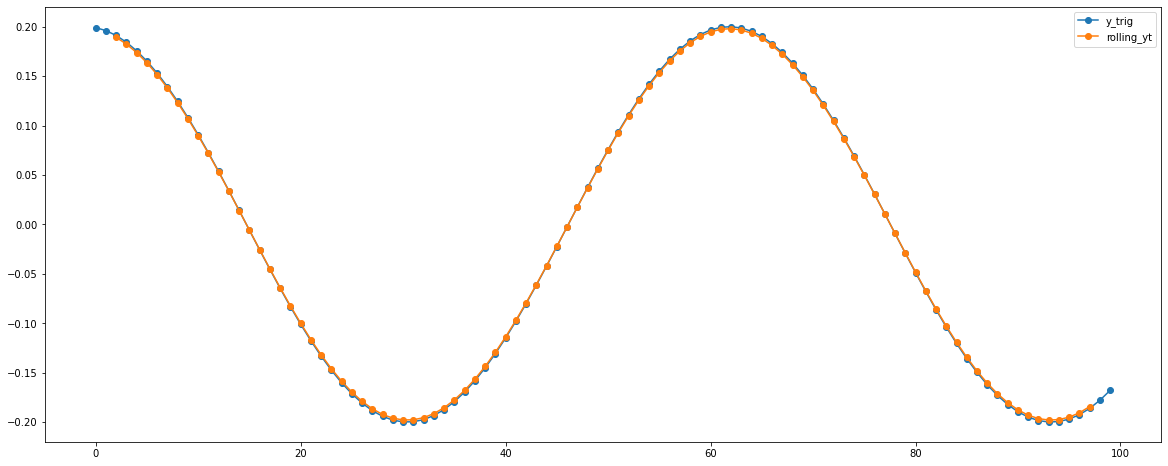

In [12]:
n = 5
test_data_df['rolling_yt'] = test_data_df['y_trig'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','rolling_yt']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

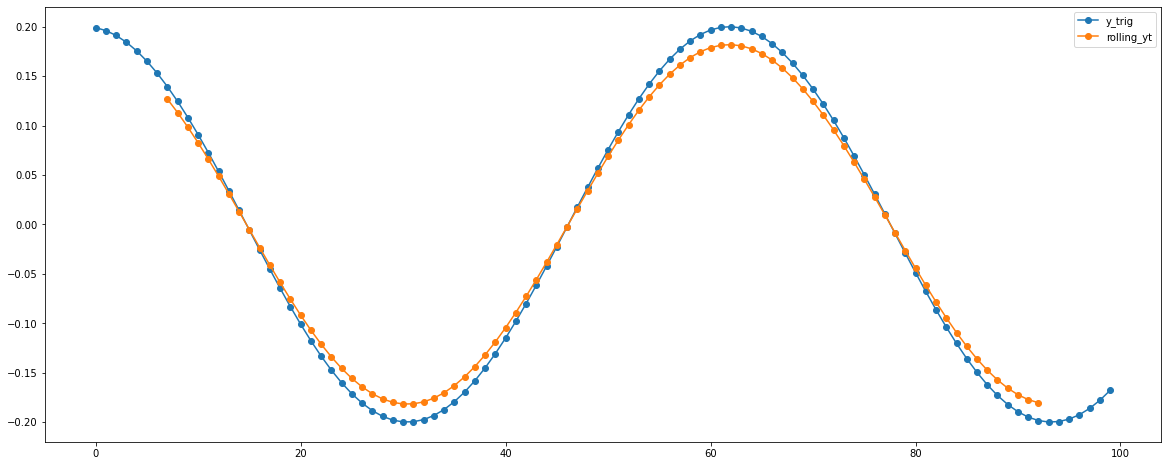

In [13]:
n = 15
test_data_df['rolling_yt'] = test_data_df['y_trig'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','rolling_yt']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

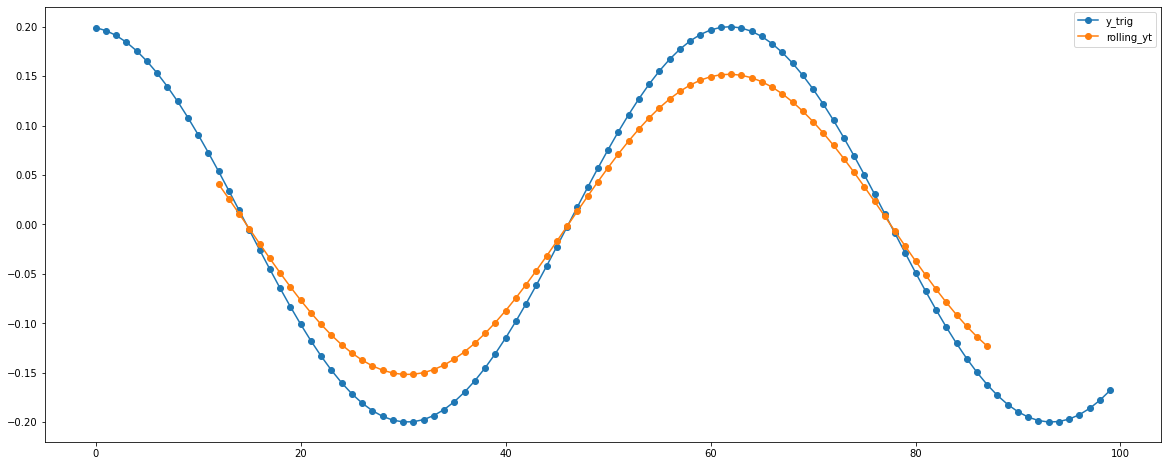

In [14]:
n = 25
test_data_df['rolling_yt'] = test_data_df['y_trig'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','rolling_yt']].plot(figsize=(20,8),style='o-')

Hmmmmm... the shape of the funciton is affected by the averaging process... we'll need to bear that in mind.

Let's look at trig + noise!

<AxesSubplot:>

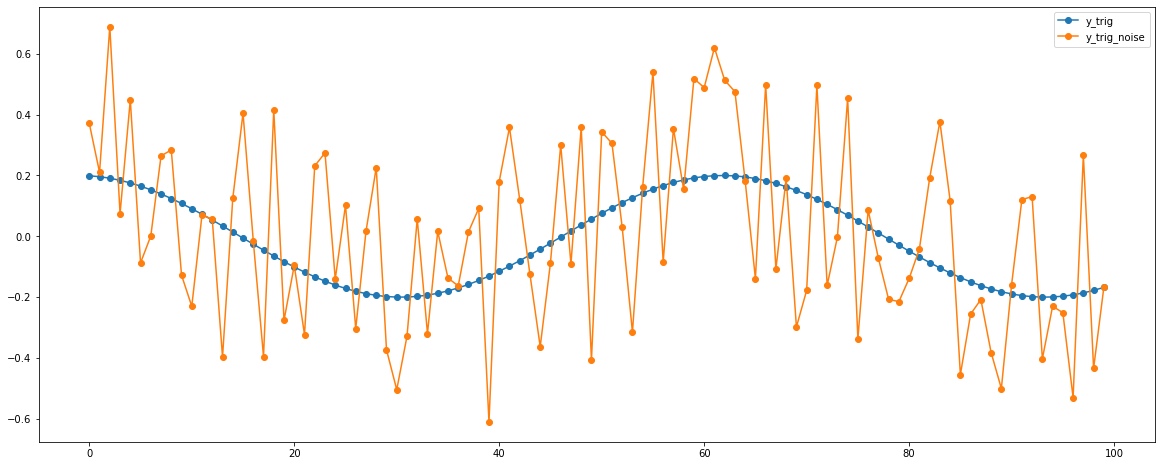

In [15]:
test_data_df[['y_trig','y_trig_noise']].plot(figsize=(20,8),style='o-')

If we do running averages on the trig+noise (the orange data) can we get something that looks more trig-like and less noisy?  

We know from the linear experiment that the longer the running average window, the more the noise gets "averaged out" but we also know that the longer the running-average window the more the running average of the trig function deviates from the trig function.  Caught between Scylla and Charybdis...

<AxesSubplot:>

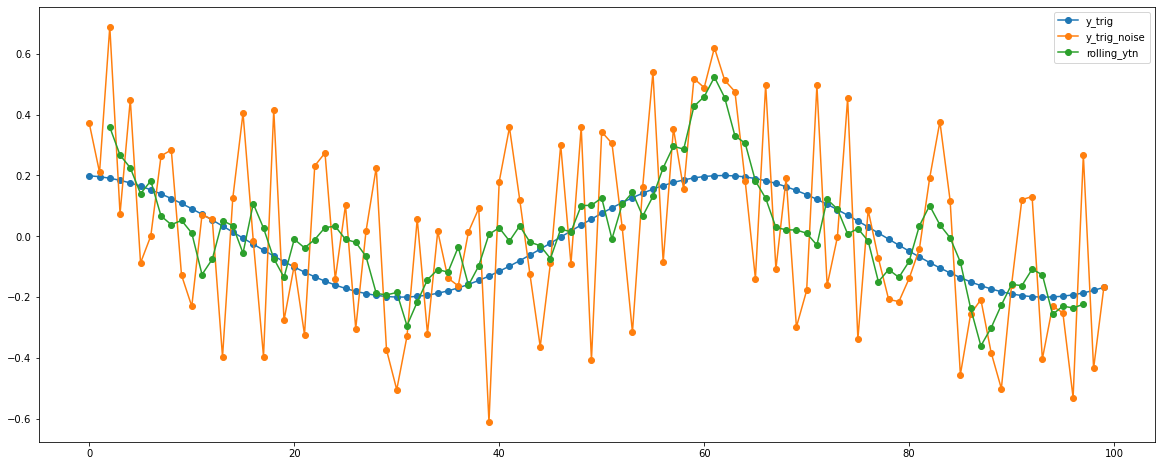

In [16]:
n = 5
test_data_df['rolling_ytn'] = test_data_df['y_trig_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','y_trig_noise','rolling_ytn']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

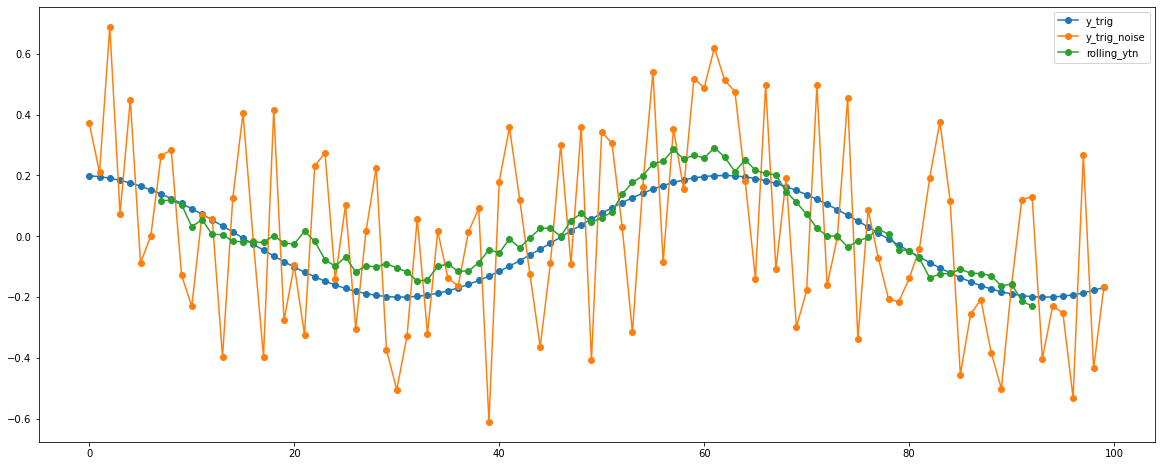

In [17]:
n = 15
test_data_df['rolling_ytn'] = test_data_df['y_trig_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','y_trig_noise','rolling_ytn']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

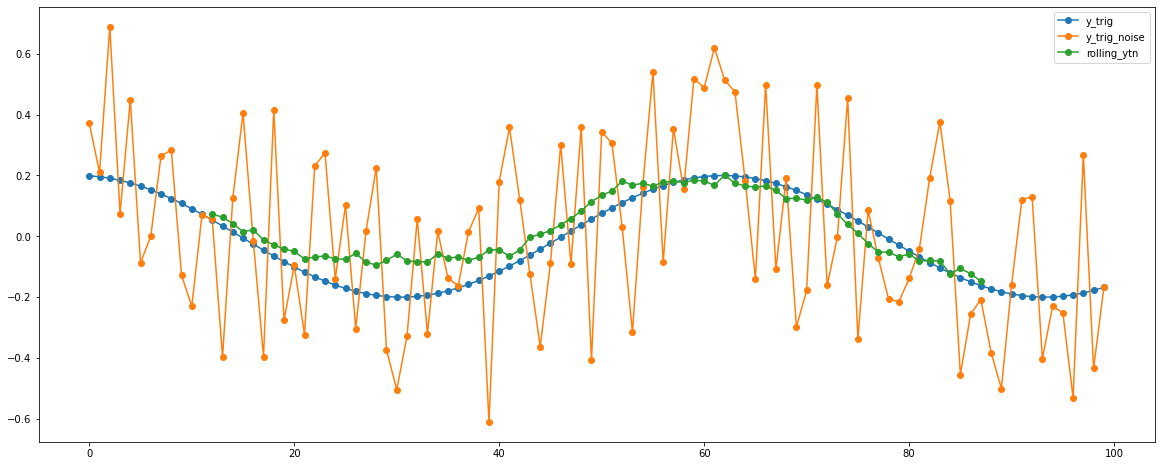

In [18]:
n = 25
test_data_df['rolling_ytn'] = test_data_df['y_trig_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','y_trig_noise','rolling_ytn']].plot(figsize=(20,8),style='o-')

<AxesSubplot:>

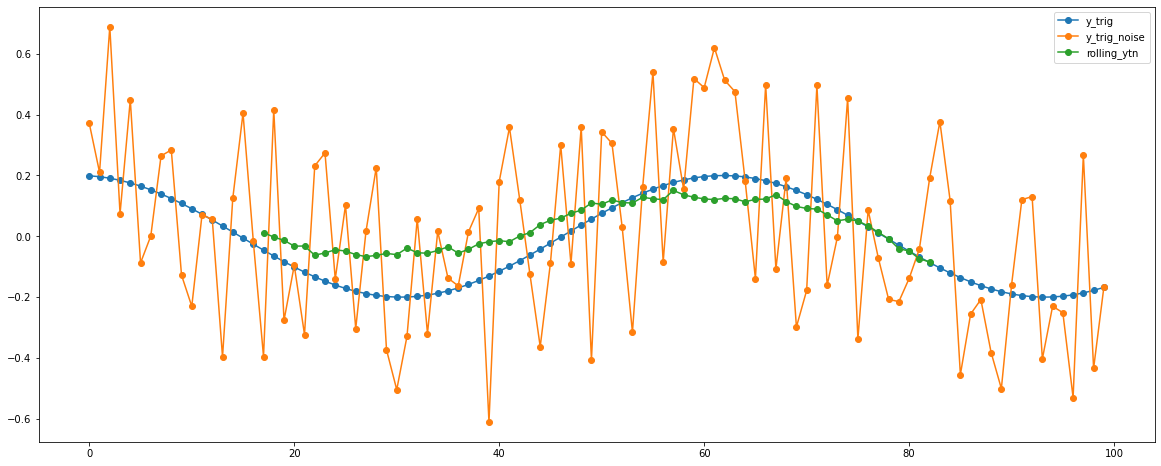

In [19]:
n = 35
test_data_df['rolling_ytn'] = test_data_df['y_trig_noise'].rolling(window=n, center=True).mean()
test_data_df[['y_trig','y_trig_noise','rolling_ytn']].plot(figsize=(20,8),style='o-')

There's seems to be some sort of "sweet spot" when the running average window is around 15 or so.  But the only reason we know this because we're working with artificially constructed data and so we know what we're aiming for.  We know what "truth" is and so even when we add noise to the truth and then try to "denoise" the result, being able to judge the quality of our tool depended on knowing the underlying truth.  In general, we don't know the underlying truth and so how do we know what's a good size of window for the running average?  

There are many different ways to smooth and/or de-noise data.  But we're not going to go there, I just wanted you to see how the rolling-averages tool behaves in some basic situations. 